# Lesson 1 - Keras implementation of fast ai part 1 v2
- This is a Keras implementation of Jeremy Howard's fastai part 1 v2 lesson 1 (original version is in PyTorch)
- This has only been tested with the TensorFlow backend to Keras

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from fastai.utils import *
from fastai.learner import *
from fastai.dataset import *

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


We will use the dogs and cats dataset

path should be replaced with the path to your downloaded dogs and cats dataset

For the original Keras dogs/cats lesson1 and instructions on downloading visit:
https://github.com/fastai/courses/blob/master/deeplearning1/nbs/lesson1.ipynb

In [2]:
PATH = "../data/dogscats/" #update with your path to cats and dogs
sz = 224

Loading in Keras' off the shelf/pretrained ResNet50 model.

***note: the PyTorch course uses ResNet34. After many hours spent writing code to convert PyTorch models and weights into Keras. I opted to use Keras' ResNet50.***

In [3]:
arch = ResNet50
data = ImageClassifierData.from_paths(path=PATH, tfms = tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, finetune2_layer='avg_pool')

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
learn.lr_find(jump=8)

{'lr': 1e-05, 'iteration': 0, 'loss': 1000000000.0}
Epoch 1/1
162/360 [============>.................] - ETA: 1:43 - loss: 0.6001
best loss: 0.037001
best lr: 0.004137
best iteration: 157
163/360 [============>.................] - ETA: 1:43 - loss: 0.5982

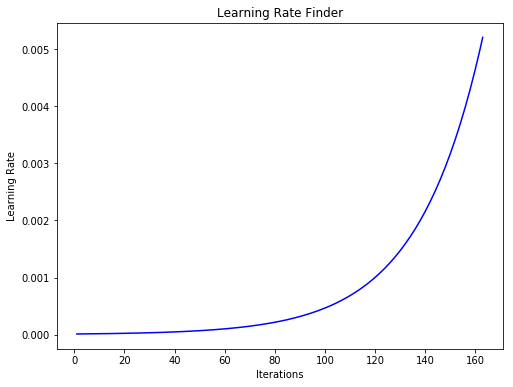

In [5]:
learn.sched.plot_lr()

{'lr': 0.0041368203, 'iteration': 157.0, 'loss': 0.037000887}


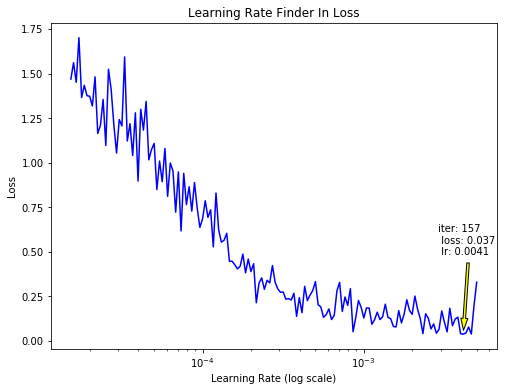

In [6]:
learn.sched.plot()

As you can see in the plot above it appears the optimal learning rate to set is .08

**Data Augmentation on the training data**

Now time to start training!  I noticed that the pretrained Keras ResNet50 model is not quite as accurate in my opinion as the pretrained PyTorch ResNet50 model.

In [7]:
tfms = tfms_from_model(arch, sz, crop_type=CropType.RANDOM, 
                  rotation_range=10, zoom_range=0.1, horizontal_flip=True)

In [9]:
#need to add random lighten
data = ImageClassifierData.from_paths(path=PATH, tfms = tfms)
learn = ConvLearner.pretrained(arch, data, finetune2_layer='avg_pool')

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [10]:
learn.fit(.001, 4)

Epoch 1/4
360/360 [==============================] - 271s 751ms/step - loss: 0.1316 - acc: 0.9514 - val_loss: 0.0690 - val_acc: 0.9750
Epoch 2/4
360/360 [==============================] - 261s 724ms/step - loss: 0.0807 - acc: 0.9703 - val_loss: 0.0677 - val_acc: 0.9790
Epoch 3/4
360/360 [==============================] - 259s 720ms/step - loss: 0.0679 - acc: 0.9762 - val_loss: 0.0635 - val_acc: 0.9815
Epoch 4/4
360/360 [==============================] - 267s 740ms/step - loss: 0.0649 - acc: 0.9758 - val_loss: 0.0656 - val_acc: 0.9760


Evaluate function may run a little slow.  I find that Keras generator's are not the fastest compared to the ones in the fastai PyTorch library.  Generally I try to load the entire dataset into memory, but since this repository is meant to be shared I opted for generators so that it works for a wider audience.

Fit for 3 epochs with a Cyclical Learning Rate

In [11]:
learn.fit(.001, 3, cycle_len=1, cycle_mult=1)

epochs: 3
Epoch 1/3
360/360 [==============================] - 267s 741ms/step - loss: 0.0572 - acc: 0.9781 - val_loss: 0.0694 - val_acc: 0.9775
Epoch 2/3
360/360 [==============================] - 260s 722ms/step - loss: 0.0600 - acc: 0.9773 - val_loss: 0.0610 - val_acc: 0.9780
Epoch 3/3
360/360 [==============================] - 260s 723ms/step - loss: 0.0531 - acc: 0.9791 - val_loss: 0.0635 - val_acc: 0.9810


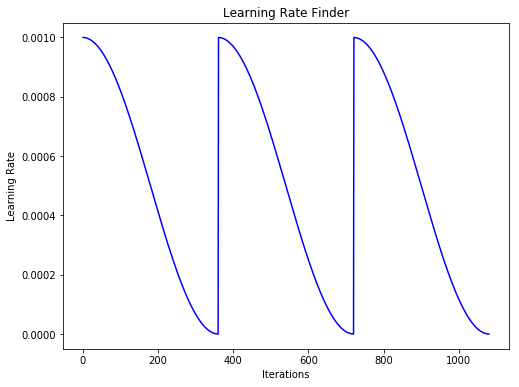

In [12]:
learn.sched.plot_lr()

In [13]:
learn.save('keras_resnet50_f2.hdf5')

Make all layers trainable

In [14]:
learn.unfreeze()

In [ ]:
lr = 0.001
learn.fit([lr/9, lr/3, lr], 3, cycle_len=1, cycle_mult=2)

epochs: 7
Epoch 1/7
360/360 [==============================] - 598s 2s/step - loss: 0.0531 - acc: 0.9797 - val_loss: 0.0553 - val_acc: 0.9795
Epoch 2/7
360/360 [==============================] - 585s 2s/step - loss: 0.0546 - acc: 0.9796 - val_loss: 0.0531 - val_acc: 0.9785
Epoch 3/7
360/360 [==============================] - 584s 2s/step - loss: 0.0498 - acc: 0.9809 - val_loss: 0.0536 - val_acc: 0.9820
Epoch 4/7
173/360 [=============>................] - ETA: 4:52 - loss: 0.0555 - acc: 0.9796

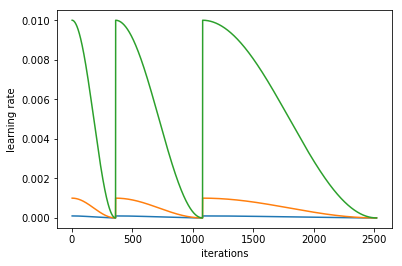

In [15]:
learn.sched.plot_lr()

In [16]:
%%time
learn.model.evaluate_generator(data[1], steps=math.ceil(data[1].samples/data[1].batch_size), workers=4 )

CPU times: user 19.5 s, sys: 372 ms, total: 19.8 s
Wall time: 8.06 s


[0.16255592977277877, 0.98699999999999999]

In [17]:
learn.save('keras_resnet50_f2_2.hdf5')